# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('cars_hw (1).csv')
data.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [30]:
summary = data.describe()
summary

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


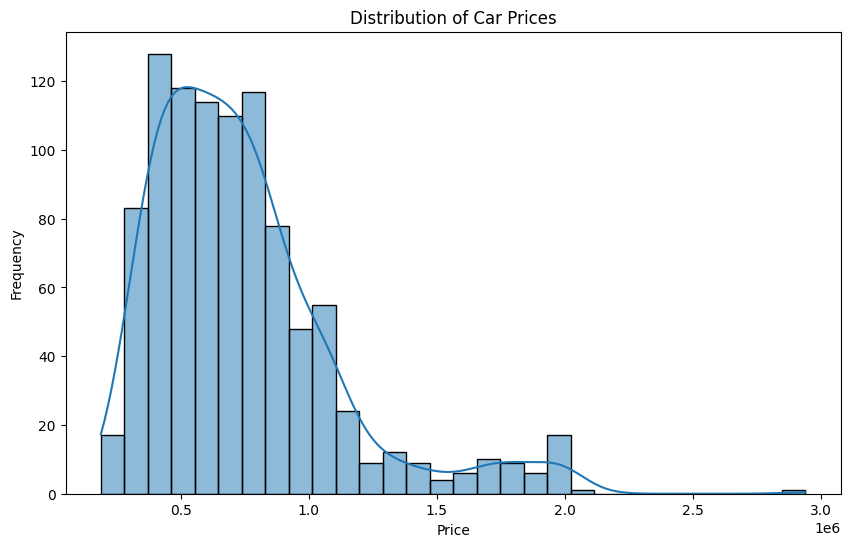

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.drop_duplicates(inplace=True)

print(data.dtypes)

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


<ipython-input-32-2af164b25be8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [33]:
import pandas as pd


categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print(data.dtypes)

Unnamed: 0           int64
Make                 int64
Make_Year            int64
Color                int64
Body_Type            int64
Mileage_Run          int64
No_of_Owners         int64
Seating_Capacity     int64
Fuel_Type            int64
Transmission         int64
Transmission_Type    int64
Price                int64
dtype: object


In [34]:
data.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,15,2017,12,3,44611,0,5,0,3,0,657000
1,2,4,2016,11,0,20305,0,5,1,1,1,682000
2,3,3,2019,13,4,29540,1,5,1,1,1,793000
3,4,11,2017,3,1,35680,0,5,1,1,1,414000
4,5,4,2017,9,1,25126,0,5,1,1,1,515000


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 780 samples
Test set size: 196 samples


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Test R^2: {test_r2:.2f}")

Training RMSE: 213919.88
Test RMSE: 194016.34
Training R^2: 0.67
Test R^2: 0.67


The test RMSE model is slightly better, however .67  R squared is the same for both the test and train models.

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



X = data[['Make_Year', 'Mileage_Run']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Complex Model Training RMSE: {train_rmse:.2f}")
print(f"Complex Model Test RMSE: {test_rmse:.2f}")
print(f"Complex Model Training R^2: {train_r2:.2f}")
print(f"Complex Model Test R^2: {test_r2:.2f}")

Complex Model Training RMSE: 308905.33
Complex Model Test RMSE: 282193.95
Complex Model Training R^2: 0.32
Complex Model Test R^2: 0.31


I incorporated the variables Make_Year and Mileage_Run to make my model more complex. I included these because I believe that these would also have an affect on the price of the cars. However, this increased the RMSE significantly, and suggests that the additional transformations and interactions did not improve the model's ability to predict prices and may have introduced more noise. Also, there is a substantial drop from the previous R squared values of 0.67, indicating that the complex model fails to capture the underlying relationships in the data effectively. Thsi could have been due to over fititng of the model.Also, the two extra vairables I selected may not equally contribute to the determination of the price variable.

I have realized that it is importannt to put thought into what variable you select to incorporate into your model. Also, it is perhaps best to fit one model at a time to see how each additional variable impacts the R squared and RMSE. In the end, increasing model complexity does not always lead to better performance. Instead, it highlights the importance of selecting appropriate features and understanding the underlying data relationship instead of learning from noise in the training data (overfitting).